In [1]:
import pandas as pd

In [2]:
air_quality = pd.read_csv('air_quality.csv')

In [3]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95685 entries, 0 to 95684
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  95685 non-null  object 
 1   PM2.5      95685 non-null  float64
 2   PM10       95685 non-null  float64
 3   SO2        95685 non-null  float64
 4   NO2        95685 non-null  float64
 5   CO         95685 non-null  float64
 6   O3         95685 non-null  float64
 7   TEMP       95685 non-null  float64
 8   PRES       95685 non-null  float64
 9   DEWP       95685 non-null  float64
 10  RAIN       95685 non-null  float64
 11  wd         95685 non-null  object 
 12  WSPM       95685 non-null  float64
 13  station    95685 non-null  object 
dtypes: float64(11), object(3)
memory usage: 10.2+ MB


In [4]:
air_quality.head()

,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 05:00:00,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
3,2013-03-01 06:00:00,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
4,2013-03-01 07:00:00,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi


In [5]:
air_quality['date_time'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [6]:
pd.to_datetime(air_quality['date_time'])

0       2013-03-01 00:00:00
1       2013-03-01 01:00:00
2       2013-03-01 05:00:00
3       2013-03-01 06:00:00
4       2013-03-01 07:00:00
                ...        
95680   2017-02-28 15:00:00
95681   2017-02-28 16:00:00
95682   2017-02-28 21:00:00
95683   2017-02-28 22:00:00
95684   2017-02-28 23:00:00
Name: date_time, Length: 95685, dtype: datetime64[ns]

In [8]:
air_quality['date_time']=pd.to_datetime(air_quality['date_time'])

In [10]:
air_quality.dtypes

date_time    datetime64[ns]
PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN                float64
wd                   object
WSPM                float64
station              object
dtype: object

In [12]:
air_quality['year']=air_quality['date_time'].dt.year
air_quality['month']=air_quality['date_time'].dt.month
air_quality['day']=air_quality['date_time'].dt.day
air_quality['hour']=air_quality['date_time'].dt.hour
air_quality['quarter']=air_quality['date_time'].dt.quarter
air_quality['day_of_week_num']=air_quality['date_time'].dt.dayofweek
air_quality['day_of_week_name']=air_quality['date_time'].dt.day_name()

air_quality[['date_time', 'year', 'month', 'day', 'hour', 'quarter', 'day_of_week_num', 'day_of_week_name']]

,date_time,year,month,day,hour,quarter,day_of_week_num,day_of_week_name
0,2013-03-01 00:00:00,2013,3,1,0,1,4,Friday
1,2013-03-01 01:00:00,2013,3,1,1,1,4,Friday
2,2013-03-01 05:00:00,2013,3,1,5,1,4,Friday
3,2013-03-01 06:00:00,2013,3,1,6,1,4,Friday
4,2013-03-01 07:00:00,2013,3,1,7,1,4,Friday
...,...,...,...,...,...,...,...,...
95680,2017-02-28 15:00:00,2017,2,28,15,1,1,Tuesday
95681,2017-02-28 16:00:00,2017,2,28,16,1,1,Tuesday
95682,2017-02-28 21:00:00,2017,2,28,21,1,1,Tuesday
95683,2017-02-28 22:00:00,2017,2,28,22,1,1,Tuesday


In [13]:
air_quality[['day_of_week_num', 'day_of_week_name']].value_counts()

day_of_week_num  day_of_week_name
6                Sunday              13931
5                Saturday            13812
4                Friday              13782
3                Thursday            13633
0                Monday              13536
1                Tuesday             13523
2                Wednesday           13468
Name: count, dtype: int64

In [14]:
air_quality['date_time'].max()

Timestamp('2017-02-28 23:00:00')

In [15]:
air_quality['date_time'].min()

Timestamp('2013-03-01 00:00:00')

In [16]:
air_quality['date_time'].max() - air_quality['date_time'].min()

Timedelta('1460 days 23:00:00')

In [17]:
date_time_range = air_quality['date_time'].max() - air_quality['date_time'].min()

In [18]:
pd.Timedelta(days=1)

Timedelta('1 days 00:00:00')

In [19]:
pd.Timedelta(days=365)

Timedelta('365 days 00:00:00')

In [20]:
date_time_range/pd.Timedelta(days=1)

1460.9583333333333

In [21]:
date_time_range/pd.Timedelta(days=365)

4.002625570776256

In [22]:
1460.9583333333333/365

4.002625570776256

In [23]:
pd.Timestamp('2022/01/01')

Timestamp('2022-01-01 00:00:00')

In [24]:
pd.Timestamp('2022/01/01') - air_quality['date_time']

0       3228 days 00:00:00
1       3227 days 23:00:00
2       3227 days 19:00:00
3       3227 days 18:00:00
4       3227 days 17:00:00
               ...        
95680   1767 days 09:00:00
95681   1767 days 08:00:00
95682   1767 days 03:00:00
95683   1767 days 02:00:00
95684   1767 days 01:00:00
Name: date_time, Length: 95685, dtype: timedelta64[ns]

In [25]:
air_quality['time_until_2022'] = pd.Timestamp('2022/01/01') - air_quality['date_time']

In [26]:
air_quality['time_until_2022']/pd.Timedelta(days=1)

0        3228.000000
1        3227.958333
2        3227.791667
3        3227.750000
4        3227.708333
            ...     
95680    1767.375000
95681    1767.333333
95682    1767.125000
95683    1767.083333
95684    1767.041667
Name: time_until_2022, Length: 95685, dtype: float64

In [28]:
air_quality['time_until_2022_days'] = air_quality['time_until_2022']/pd.Timedelta(days=1)
air_quality['time_until_2022_weeks'] = air_quality['time_until_2022']/pd.Timedelta(weeks=1)

In [29]:
air_quality[['date_time', 'time_until_2022', 'time_until_2022_days', 'time_until_2022_weeks']]

,date_time,time_until_2022,time_until_2022_days,time_until_2022_weeks
0,2013-03-01 00:00:00,3228 days 00:00:00,3228.000000,461.142857
1,2013-03-01 01:00:00,3227 days 23:00:00,3227.958333,461.136905
2,2013-03-01 05:00:00,3227 days 19:00:00,3227.791667,461.113095
3,2013-03-01 06:00:00,3227 days 18:00:00,3227.750000,461.107143
4,2013-03-01 07:00:00,3227 days 17:00:00,3227.708333,461.101190
...,...,...,...,...
95680,2017-02-28 15:00:00,1767 days 09:00:00,1767.375000,252.482143
95681,2017-02-28 16:00:00,1767 days 08:00:00,1767.333333,252.476190
95682,2017-02-28 21:00:00,1767 days 03:00:00,1767.125000,252.446429
95683,2017-02-28 22:00:00,1767 days 02:00:00,1767.083333,252.440476


In [30]:
3228/7

461.14285714285717

In [31]:
air_quality['date_time']<pd.Timestamp('2016/01/01')

0         True
1         True
2         True
3         True
4         True
         ...  
95680    False
95681    False
95682    False
95683    False
95684    False
Name: date_time, Length: 95685, dtype: bool

In [32]:
air_quality['prior_2016_ind'] = air_quality['date_time']<pd.Timestamp('2016/01/01')

In [33]:
air_quality[['date_time', 'prior_2016_ind']]

,date_time,prior_2016_ind
0,2013-03-01 00:00:00,True
1,2013-03-01 01:00:00,True
2,2013-03-01 05:00:00,True
3,2013-03-01 06:00:00,True
4,2013-03-01 07:00:00,True
...,...,...
95680,2017-02-28 15:00:00,False
95681,2017-02-28 16:00:00,False
95682,2017-02-28 21:00:00,False
95683,2017-02-28 22:00:00,False


In [34]:
air_quality.columns

Index(['date_time', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'year', 'month', 'day', 'hour',
       'quarter', 'day_of_week_num', 'day_of_week_name', 'time_until_2022',
       'time_until_2022_days', 'time_until_2022_weeks', 'prior_2016_ind'],
      dtype='object')

In [35]:
## Lesson on Binning Begins Below ##

In [37]:
air_quality['PM2.5'].head()

0    9.0
1    4.0
2    4.0
3    5.0
4    3.0
Name: PM2.5, dtype: float64

<Axes: >

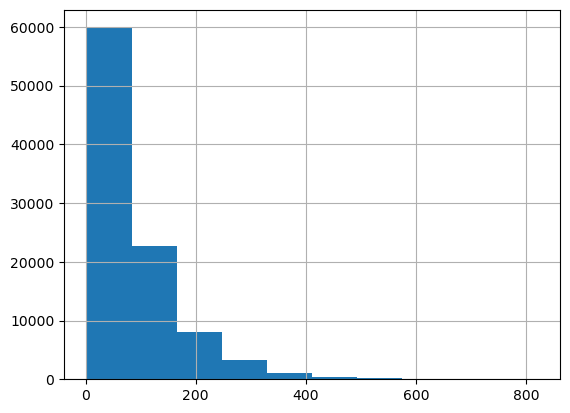

In [38]:
air_quality['PM2.5'].hist()

In [40]:
pd.cut(air_quality['PM2.5'], bins=10).value_counts()

PM2.5
(1.181, 83.9]     59923
(83.9, 165.8]     22741
(165.8, 247.7]     8132
(247.7, 329.6]     3225
(329.6, 411.5]     1011
(411.5, 493.4]      384
(493.4, 575.3]      171
(575.3, 657.2]       70
(657.2, 739.1]       22
(739.1, 821.0]        6
Name: count, dtype: int64

In [41]:
83.9-1.181

82.71900000000001

In [42]:
247.7-165.8

81.89999999999998

In [45]:
air_quality['PM2.5_category']=pd.cut(air_quality['PM2.5'], bins=[0,12,35.4,55.4,150.4,250.4,999], labels=['Good', 'Moderate', 'Unhealthy for sensitive groups', 'Unhealthy', 'Very unhealthy', 'Hazardous'])

In [46]:
air_quality[['PM2.5', 'PM2.5_category']]

,PM2.5,PM2.5_category
0,9.0,Good
1,4.0,Good
2,4.0,Good
3,5.0,Good
4,3.0,Good
...,...,...
95680,9.0,Good
95681,10.0,Good
95682,18.0,Moderate
95683,15.0,Moderate


In [48]:
air_quality['PM2.5_category'].value_counts(normalize = True)

PM2.5_category
Unhealthy                         0.358018
Moderate                          0.207483
Good                              0.141882
Unhealthy for sensitive groups    0.130188
Very unhealthy                    0.113090
Hazardous                         0.049339
Name: proportion, dtype: float64

In [51]:
pd.qcut(air_quality['PM2.5'], q=4).value_counts(normalize=True, sort=False)

PM2.5
(1.999, 23.0]     0.258222
(23.0, 59.0]      0.244803
(59.0, 116.0]     0.249862
(116.0, 821.0]    0.247113
Name: proportion, dtype: float64

In [52]:
air_quality['PM2.5'].describe()

count    95685.000000
mean        83.477884
std         82.678134
min          2.000000
25%         23.000000
50%         59.000000
75%        116.000000
max        821.000000
Name: PM2.5, dtype: float64

In [55]:
pd.qcut(air_quality['TEMP'], q=5, labels=['Very cold', 'Cold', 'Warm', 'Hot', 'Very hot']).value_counts()

TEMP
Hot          19189
Very cold    19156
Cold         19154
Warm         19143
Very hot     19043
Name: count, dtype: int64

In [56]:
air_quality['TEMP_category']=pd.qcut(air_quality['TEMP'], q=5, labels=['Very cold', 'Cold', 'Warm', 'Hot', 'Very hot'])

In [57]:
air_quality[['TEMP', 'TEMP_category']]

,TEMP,TEMP_category
0,-0.5,Very cold
1,-0.7,Very cold
2,-2.4,Very cold
3,-2.5,Very cold
4,-1.4,Very cold
...,...,...
95680,15.4,Warm
95681,14.9,Warm
95682,10.8,Warm
95683,10.5,Warm


In [58]:
air_quality.to_pickle('air_quality.pkl')